# Chapter 12. 확률 과정
> 예측이라는 것은 저절로 되지 않는다. 그렇다고 불가능한 일은 아니다.  
-라힐 파루프(Raheel Farooq)

오늘날 확률 과정(stochastic process)은 금융공학 분야에서 가장 중요한 수학 및 수치해석 분야입니다. 현대 금융공학의 초기라 할수 있는 1970년대와 1980년대, 금융공학 연구의 가장 큰 목표는 주어진 특정한 금융공학 모형하에서 옵션 가격을 계산하는 닫힌 형태(closed-form)의 공식을 구하는 것이었습니다. 이 목표는 최근 급격히 바뀌었는데 그 이유는 금융 상품 하나의 가치를 계산하는 것뿐만 아니라 전체 파생상품 북을 일관되게 평가하는 일이 중요해졌기 때문입니다. 또한 금융기관 전체의 위험을 VaR 혹은 CVA 등의 위험 측정 방법을 사용하여 일관되게 측정하기 위해서는 금융기관 전체 혹은 거리 상대방의 **북**을 모두 고려해야 합니다. 이런 방대한 작업은 더 유연하고 효율적인 수치해석 방법으로만 풀 수 있습니다. 따라서 일반적인 확률 과정과 몬테카를로 시뮬레이션이 중요합니다.

* 복수의 금융 상품 운용 혹은 위험 관리 목적으로 하나의 집합으로 묶어서 취급하는 것을 실무에서 '북(Book)'이라고 합니다.
* VaR (Value-at-Risk): 특정한 상황에서 계산된 위험 금액. 이 단어는 실무나 규정에서도 번역되지 않고 사용되며, 보통 '바'라고 읽습니다.
* CVA (Credit Value Adjustment): 거래 상대방의 신용도 하락으로 인한 손실 위험을 추가로 고려한 위험 금액을 의미합니다. 이 단어도 실무나 규정에서도 번역되지 않고 사용됩니다.

이 장에서는 파이썬 관점에서 다음과 같은 주제를 소개합니다.

* 난수 생성: 난수 생성은 모든 시뮬레이션 작업의 근간입니다. 소볼(Sobol) 수열에 기반한 준-난수(quasi random number)가 점점 많이 사용되고 있지만 아직은 일반적인 의사 난수(pseudo random number)가 여전히 이 분야의 기준입니다.
* 시뮬레이션: 금융공학에서 가장 중요한 두 개의 시뮬레이션 작업은 확률 변수의 시뮬레이션과 확률 과정의 시뮬레이션입니다.
* 가치 평가: 파생상품 가치 평가는 크게 특정한 행사일을 가지는 유러피안 방식과 특정한 행사 기간을 가지는 아메리칸 방식으로 나뉩니다. 특정한 복수의 날짜에 행사가 가능한 버뮤다(Bermudan) 방식의 상품도 존재합니다.
* 위험 측도: 시뮬레이션은 VaR, CVaR, CVA 등의 위험 측도를 계산하는 용도에도 잘 맞습니다.


## 12.1 난수 생성
이 장에서는 난수를 생성하기 위해 `numpy.random` 서브패키지에서 제공되는 함수를 이용하겠습니다.

In [1]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

C:\Users\tjk\AppData\Local\Temp\ipykernel_20056\3828322551.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


예를 들어 `rand()` 함수는 구간 $[0,1)$ 사이의 난수를 함수 인수에서 정한 형태로 반환합니다. 반환 객체는 `ndarray` 객체입니다. 이 숫자들을 실제 필요한 구간의 숫자로 변환하는 것은 쉽습니다. 예를 들어 구간 $[5, 10)$ 사이의 난수를 생성하고 싶다면 `npr.rand()` 함수가 반환한 숫자를 다음과 같이 변환합니다. 넘파이 브로드캐스팅 기능 덕분에 다차원에서도 동작합니다.

In [3]:
npr.seed(100)
np.set_printoptions(precision=4)

In [4]:
npr.rand(10) # 균일분포 난수 1차원 ndarray 객체

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [5]:
npr.rand(5, 5) # 균일분포 난수 2차원 ndarray 객체

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [6]:
a = 5.
b = 10.
npr.rand(10) * (b - a) + a # 구간 변환

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [7]:
npr.rand(5, 5) * (b - a) + a # 2차원 변환

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

아래 표는 간단한 난수를 생성하는 함수들입니다.  

|함수|인수|설명|
|---|---|---|
|`rand`|`d0, d1, ..., dn`|주어진 형태로 난수 생성|
|`randn`|`d0, d1, ..., dn`|표준정교분포의 샘플 생성|
|`randint`|`low[,high,size]`|`low`(포함)부터 `high`(미포함)까지 무작위 정수 생성|
|`random_integers`|`low[,high,size]`|`low`(포함)부터 `high`(포함)까지 무작위 정수 생성|
|`random_sample`|`[size]`|[0.0, 1.0) 구간의 float형 난수|
|`random`|`[size]`|[0.0, 1.0) 구간의 float형 난수|
|`randf`|`[size]`|[0.0, 1.0) 구간의 float형 난수|
|`sample`|`[size]`|[0.0, 1.0) 구간의 float형 난수|
|`choice`|`a[,size,replace,p]`|주어진 1차원 배열에서 무작위 샘플 채취|
|`bytes`|`length`|무작위 바이트|  

표의 함수 중 몇 가지를 선택하고 시각화해보겠습니다. 아래 그림들은 두 가지 연속 분포와 두 가지 이산 분포 샘플 생성 결과입니다.

In [8]:
sample_size = 500
rn1 = npr.rand(sample_size, 3) # 균일분포 난수
rn2 = npr.randint(0, 10, sample_size) # 주어진 구간에 대한 난수
rn3 = npr.sample(size=sample_size) # 균일분포 난수

# 유한 개의 원소를 가지는 list 객체에서 무작위로 선택된 값
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

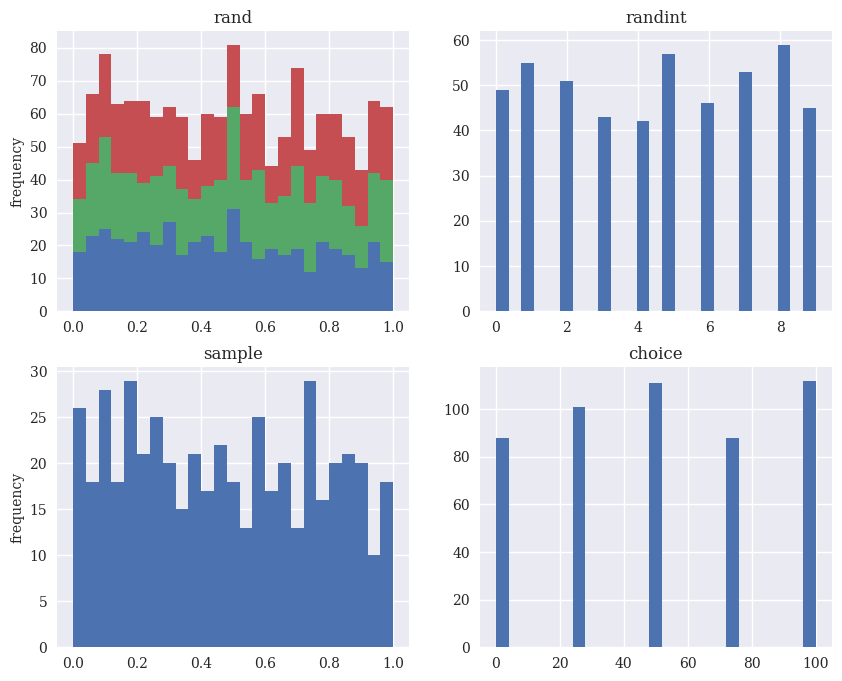

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25, stacked=True)
ax2.set_title('randint')
ax3.hist(rn3, bins=25, stacked=True)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25, stacked=True)
ax4.set_title('choice');

다음 표는 특정한 확률 분포를 따르는 난수 함수**들**을 나열했습니다. ~~스끼다시로 골라먹읍시다~~  

|함수|인수|설명|
|---|---|---|
|`beta`|`a,b[,size]`|구간 [0,1]의 베타 분포|
|`binomial`|`n,p[,size]`|이항 분포|
|`chisquare`|`df[,size]`|카이 제곱 분포|
|`dirichlet`|`alpha[,size]`|디리클레 분포|
|`exponential`|`[scale,size]`|지수 분포|
|`f`|`dfnum,dfden[,size]`|F 분포|
|`gamma`|`shape[,scale,size]`|감마 분포|
|`geometric`|`p[,size]`|기하 분포|
|`gumbel`|`[loc,scale,size]`|검벨 분포|
|`hypergeometric`|`ngood,nbad,nsample[,size]`|초기하 분포|
|`laplace`|`[loc,scale,size]`|라플라스 분포(a.k.a 이중지수 분포)|
|`logistic`|`[loc,scale,size]`|로지스틱 분포|
|`lognormal`|`[mean,sigma,size]`|로그 정규분포|
|`logseries`|`p[,size]`|로그계열(logarithmic series) 분포|
|`multinomial`|`n,pvals[,size]`|다항 분포|
|`multivariate_normal`|`mean,cov[,size]`|다변량 정규 분포|
|`negative_binomial`|`n,p[,size]`|음이항 분포|
|`noncentral_chisquare`|`df,nonc[,size]`|비중심 카이 제곱 분포|
|`noncentral_f`|`dfnum,dfden,nonc[,size]`|비중심 F 분포|
|`normal`|`[loc,scale,size]`|가우시안(Gaussian) 정규 분포|
|`pareto`|`a[,size]`|제2종 파레토 분포(또는 특정 형태의 로맥스(Lomax) 분포)|
|`poisson`|`[lam,size]`|푸아송 분포|
|`power`|`a[,size]`|양의 지수 a-1을 가지는 power 분포|
|`rayleigh`|`[scale,size]`|레일리 분포|
|`standard_cauchy`|`[size]`|코시 분포|
|`standard_exponentail`|`[size]`|표준지수분포|
|`standard_gamma`|`shape[,size]`|표준감마분포|
|`standard_normal`|`[size]`|표준정규분포|
|`standard_t`|`df[,size]`|표준 스튜던트(Student's) t 분포|
|`triangular`|`left,mode,right[,size]`|삼각 분포|
|`uniform`|`[low,high,size]`|균일 분포|
|`vonmises`|`mu,kappa,[size]`|폰 미제스(von Mises) 분포|
|`wald`|`mean,scale[,size]`|왈드(Wald) 분포 또는 역 가우시안(reverse Gaussian) 분포|
|`weibull`|`a[,size]`|베이불(Weibull) 분포|
|`zipf`|`a[,size]`|지프(Zipf) 분포|  

금융공학에서 표준정규분포를 사용하는 것에 대해서는 이견이 많지만, 표준정규분포는 분석이나 수치해석 분야에서 필수불가결한 도구이고 가장 많이 사용되는 분포입니다. 많은 금융공학 모형이 직간접적으로 정규분포나 로그 정규분포에 의지하고 있는 것이 첫 번째 이유고, (로그) 정규분포 가정이 없는 다른 많은 금융공학 모형도 시뮬레이션 목적에서는 정규분포를 사용하여 근사화할 수 있다는 것이 또 하나의 이유입니다. 예시를 위해 다음 그림에 네 가지 분포를 그려보겠습니다.  
* 평균이 0이고 표준편차가 1인 표준정규분포
* 평균이 100이고 표준편차가 20인 정규분포
* 0.5 자유도를 가진 카이 제곱 분포
* 람다 계수가 1인 푸아송 분포  

다음 그림은 앞의 세 가지 연속 분포와 한 가지 이산 분포의 시각화 결과입니다. 푸아송 분포는 외부 쇼크나 금융 상품 가격의 갑작스러운 변화 등 드물게 발생하는 사건의 발생 분포를 시뮬레이션합니다.

In [10]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

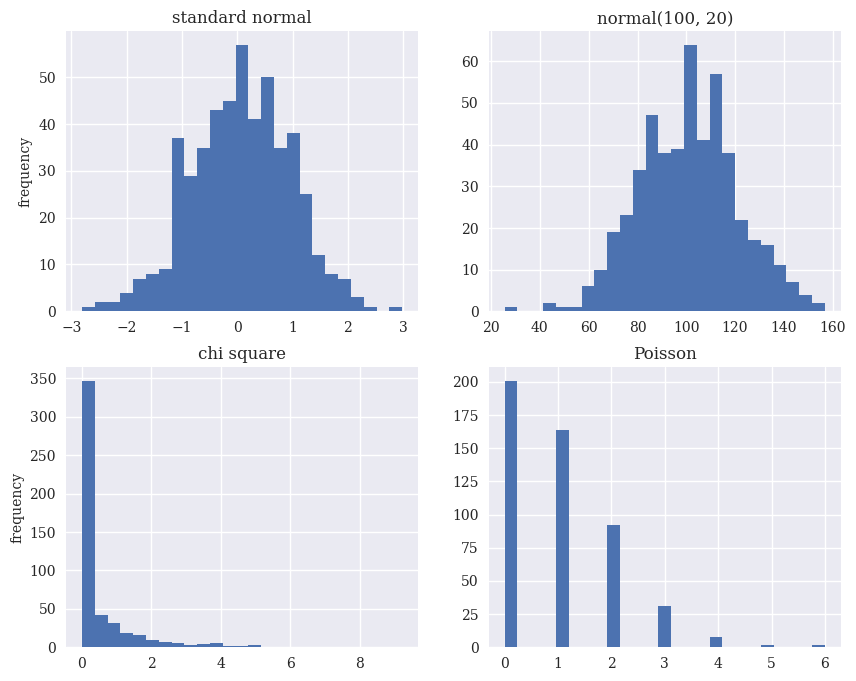

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25, stacked=True)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25, stacked=True)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25, stacked=True)
ax4.set_title('Poisson');

> **TIP** NumPy와 난수  
이 절에서는 파이썬으로 의사 난수를 생성할 때 넘파이가 강력하고 필수적인 도구라는 것을 ~~뼈저리게~~ 느낄 수 있었습니다. 작든 크든 난수 `ndarray` 객체를 생성하는 것이 편리하고 강력합니다.  


## 12.2 시뮬레이션
### 12.2.1 확률 변수
예를 들어 옵션 가격결정을 위해 블랙-숄즈-머튼 모형을 사용하면 미래의 특정 시점 $T$에서의 주가 $S_T$를 현 시점의 주가 $S_0$와 아래 수식으로 계산할 수 있습니다.  
$$S_T=S_0\exp{\left(\left(r-\frac{1}{2}\sigma^2\right)T+\sigma\sqrt{T}z\right)}$$

In [12]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r-0.5*sigma**2)*T + sigma*math.sqrt(T)*npr.standard_normal(I))

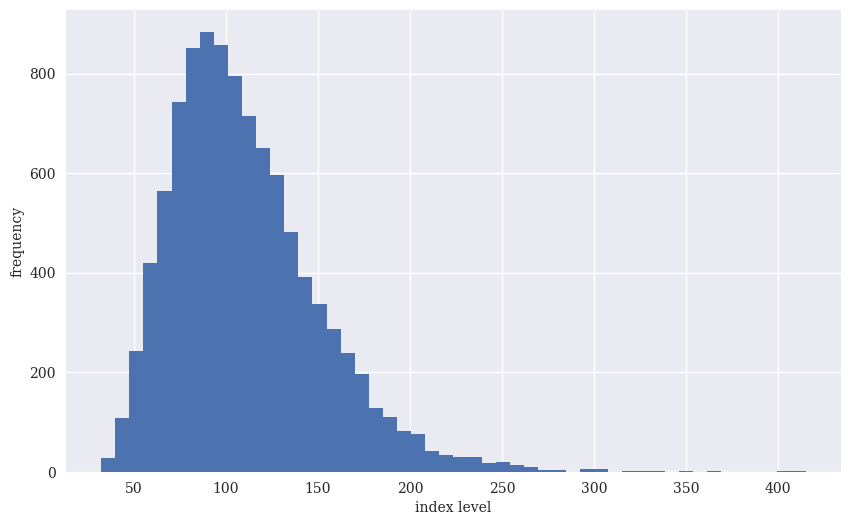

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

위 그림은 수식에서 로그 정규분포로 정의된 확률변수의 분포를 보여줍니다. `npr.lognormal()` 함수를 써서 정규분포 대신 로그 정규분포를 직접 사용해보겠습니다. 함수를 사용하려면 평균과 표준편차를 인수로 부여해야 합니다.

In [14]:
ST2 = S0 * npr.lognormal((r-0.5*sigma**2)*T, sigma*math.sqrt(T), size=I)

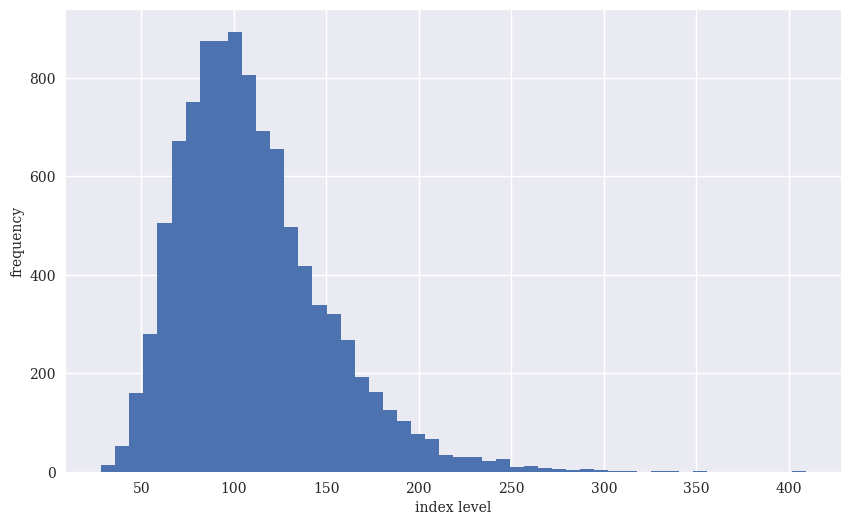

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

두 그림의 개형을 보면 서로 닮았죠? 그렇다면 통계 모멘트를 비교하여 두 분포가 같다는 것을 증명해보겠습니다. 시뮬레이션 결과의 통계 특성을 비교하기 위해 `scipy.stats` 서브패키지와 `print_statistics()`라는 보조 함수를 사용합니다.

In [16]:
import scipy.stats as scs

In [17]:
def print_statistics(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print(f"{'statistic':14s} {'data set 1':14s} {'data set 2':14s}")
    print(45 * "-")
    print(f"{'size':14s} {sta1[0]:14.3f} {sta2[0]:14.3f}")
    print(f"{'min':14s} {sta1[1][0]:14.3f} {sta2[1][0]:14.3f}")
    print(f"{'max':14s} {sta1[1][1]:14.3f} {sta2[1][1]:14.3f}")
    print(f"{'mean':14s} {sta1[2]:14.3f} {sta2[2]:14.3f}")
    print(f"{'std':14s} {sta1[3]:14.3f} {sta2[3]:14.3f}")
    print(f"{'skew':14s} {sta1[4]:14.3f} {sta2[4]:14.3f}")
    print(f"{'kurtosis':14s} {sta1[5]:14.3f} {sta2[5]:14.3f}")

In [18]:
print_statistics(ST1, ST2)

statistic      data set 1     data set 2    
---------------------------------------------
size                10000.000      10000.000
min                    32.327         28.230
max                   414.825        409.110
mean                  110.730        110.431
std                  1624.068       1590.235
skew                    1.122          1.115
kurtosis                2.438          2.217


두 시뮬레이션의 결과 통계치가 매우 유사합니다. 약간의 차는 시뮬레이션에서 발생한 샘플링 오차(sampling error)입니다. 연속 확률 과정을 이산화하는 과정에서 발생한 이산화 오차(discretization error)라는 유형의 오차도 일반적으로는 발생할 수 있지만, 이 경우에는 시뮬레이션의 정적인 특성상 이산화 오차가 없습니다.

### 12.2.2 확률 과정
확률 과정(stochastic process)은 단순하게 말하면 확률변수의 수열입니다. 따라서 확률 과정의 시뮬레이션이란 확률변수를 반복해서 시뮬레이션하는 것과 유사합니다. 다만 각 단계의 샘플이 독립적이지 않고 이전의 결과들에 의존한다는 차이점이 있습니다. 금융에서 사용되는 대부분의 확률 과정은 미래 값이 바로 전의 과거 값에만 의존하고 그보다 더 과거의 값이나 전체 경로에는 의존하지 않는 마르코프(Markov) 특성을 가지는 확률 과정입니다. 이러한 확률 과정을 무기억성(memoryless) 확률 과정이라고도 합니다.

#### 기하 브라운 운동 모형
이제 아래의 확률 미분방정식(stochastic differential equation, SDE)을 따르는 동적인 형태의 블랙-숄즈-머튼 모형을 생각해보겠습니다. 이 SDE를 기하 브라운 운동(geometric Brownian motion)이라고 하며, 이 식에서 $Z_t$는 표준 브라운 운동 과정의 값을 나타냅니다. $S_t$ 값은 로그 정규분포를 따르고, 수익률 $\frac{\mathrm{d}S_t}{S_t}$는 정규분포를 따릅니다.  
$$\mathrm{d}S_t=rS_t\mathrm{d}t + \sigma S_t\mathrm{d}Z_t$$  
위 수식의 SDE는 오일러 방식(Euler scheme)으로 정확히 이산화(discritization)할 수 있습니다. 이 방법은 아래 수식과 같습니다. 여기서 $\Delta t$는 고정된 시간 이산화 간격이고, $z_t$는 정규분포를 따르는 확률변수입니다.  
$$S_t=S_{t-\Delta t}\exp{\left(\left(r-\frac{1}{2}\sigma^2\right)\Delta t+\sigma\sqrt{\Delta t}z_t\right)}$$  
이제 이걸 파이썬과 넘파이 코드로 바꿔보겠습니다. 주가 시뮬레이션 결과가 로그 정규분포를 따르는 것을 아래 그림에서 확인할 수 있습니다.

In [19]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                             sigma * math.sqrt(dt) * npr.standard_normal(I))

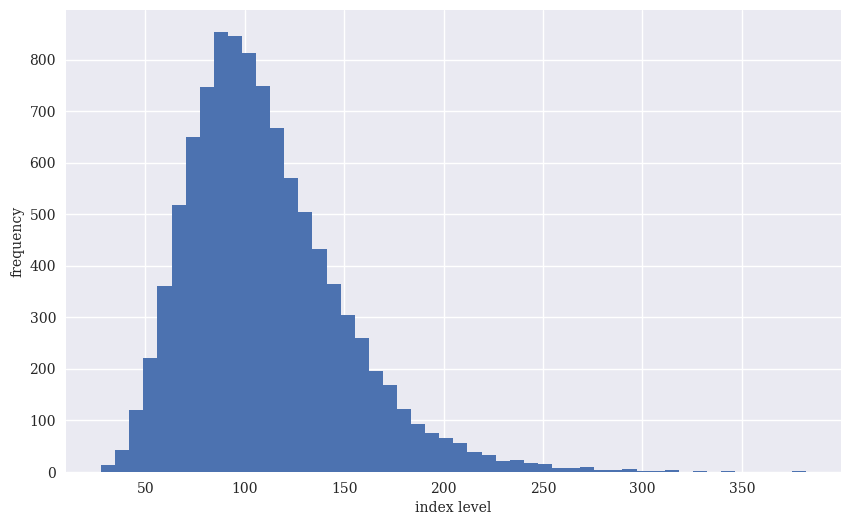

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

결과의 통계치도 정적 시뮬레이션 방식에서 나온 값과 거의 일치합니다. 아래 그림을 보면 시뮬레이션 경로 중 10개만 보입니다.

In [21]:
print_statistics(S[-1], ST2)

statistic      data set 1     data set 2    
---------------------------------------------
size                10000.000      10000.000
min                    27.746         28.230
max                   382.096        409.110
mean                  110.423        110.431
std                  1534.997       1590.235
skew                    1.069          1.115
kurtosis                2.028          2.217


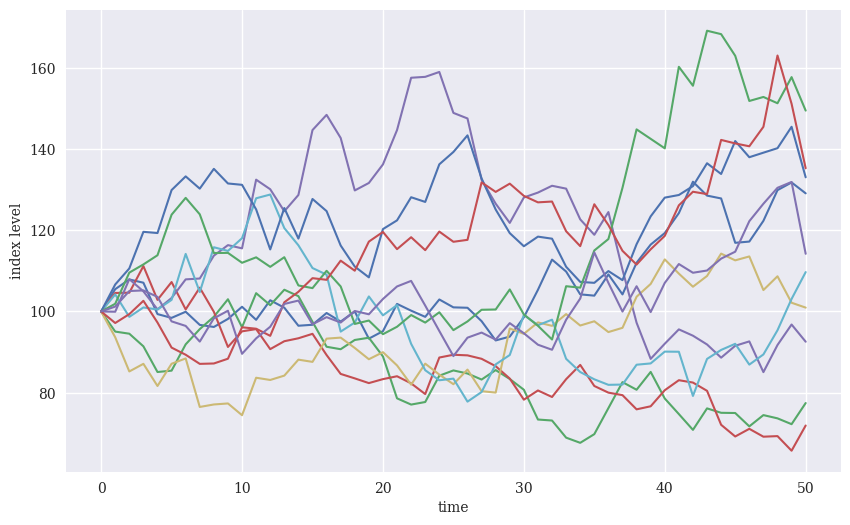

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

동적 시뮬레이션을 사용하면 위 그림처럼 경로를 시각화할 수 있을 뿐만 아니라 아메리칸/버뮤다 옵션처럼 페이오프가 경로 의존적인 옵션의 가격도 계산할 수 있습니다. 즉, 모든 동적 특성을 고려할 수 있습니다.
#### 제곱근 확산 모형
금융공학에서 중요한 또 하나의 확률 과정은 단기 이자율이나 변동성 모형에 사용되는 **평균 회귀 과정**(mean-reverting process)입니다. 여기서 가장 널리 사용되는 모형은 콕스-잉거솔-로스(Cox-Ingersoll-Ross, 1985)가 제안한 제곱근 확산(square-root diffusion) 모형입니다. 아래 수식은 이에 해당하는 SDE입니다.  
$$\mathrm{d}x_t=\kappa\left(\theta-x_t\right)\mathrm{d}t +\sigma\sqrt{x_t}\mathrm{d}Z_t$$  
($x_t$: 시간 $t$에서의 확률 과정 값, $\kappa$: 평균 회귀계수, $\theta$: 확률 과정의 장기 평균, $\sigma$: 고정 변동성, $Z_t$: 표준 브라운 운동)  
$x_t$가 카이 제곱 분포를 따른다는 사실은 잘 알려져 있습니다. 그러나 앞서 말한 바와 같이 많은 금융공학 모형이 이산화가 가능하고 정규분포로 근사화가 가능합니다. 오일러 방식은 기하 브라운 운동 모형에만 정확히 적용 가능하고 대부분의 다른 확률 과정에서는 편향 오차를 가집니다.  
제곱근 확산 모형에 대해서도 정확한 이산 방법이 존재하고, 잠시 후에 다루기는 할 거지만, 오일러 방식을 사용하는 쪽이 계산상의 이점이 많습니다. $s=t-\Delta t$와 $x^{+}\equiv \max{x, 0}$로 정의하면 아래 수식과 같이 오일러 방식을 적용할 수 있습니다. 이 방식을 **풀 트렁케이션 이산화 방식**(full-truncation discritization scheme)이라고 합니다.
> 자세한 사항은 Hilpisch(2015)를 참고하세요.

$$\tilde{x}_t=\tilde{x}_s+\kappa\left(\theta-\tilde{x}_s^{+}\right)\Delta t + \sigma\sqrt{\tilde{x}_s^{+}}\sqrt{\Delta t}z_t$$  
$$\tilde{x}_t=\tilde{x}_s^{+}$$  
제곱근 확산 모형은 $x_t$ 값이 항상 양수로 유지된다는 현실적이고 편리한 특성을 가집니다. 하지만 단순 오일러 방식으로 이산화하면 음수가 될 가능성이 생기기 때문에 원래의 시뮬레이션 값에서 양수만을 취하는 방식을 사용합니다. 따라서 시뮬레이션 코드에도 확률 과정의 값을 저장하기 위해 하나가 아닌 두 개의 `ndarray` 객체가 필요합니다. 아래 그림에서 시뮬레이션 결과를 히스토그램으로 보여줍니다.

In [23]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1
I = 10000
M = 50
dt = T / M

In [24]:
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
                 sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
                 math.sqrt(dt) * npr.standard_normal(I))
    x = np.maximum(xh, 0)
    return x

In [25]:
x1 = srd_euler()

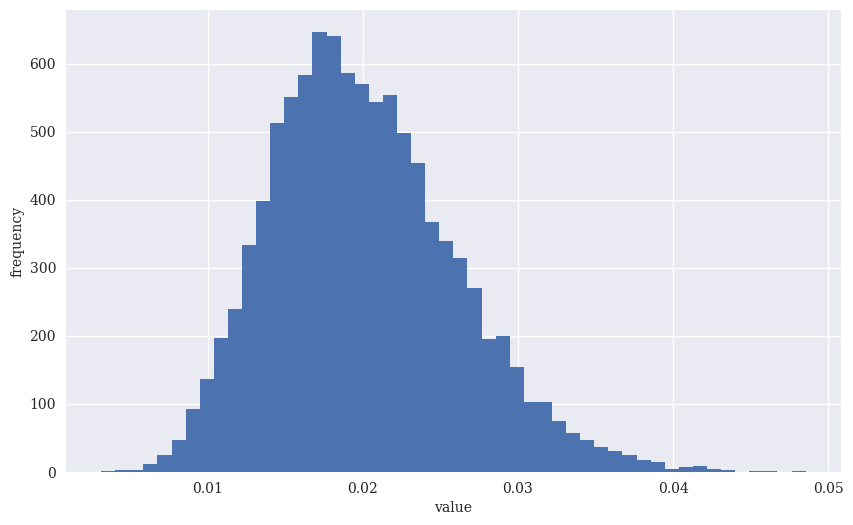

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

아래 그림에는 처음 10개의 시뮬레이션 경로를 보여줍니다. 현재 값이 장기 평균 $\theta=0.02$보다 높기 때문에 표류 경향(drift)이 음수가 되고 장기 평균으로 수렴하는 것을 볼 수 있습니다.

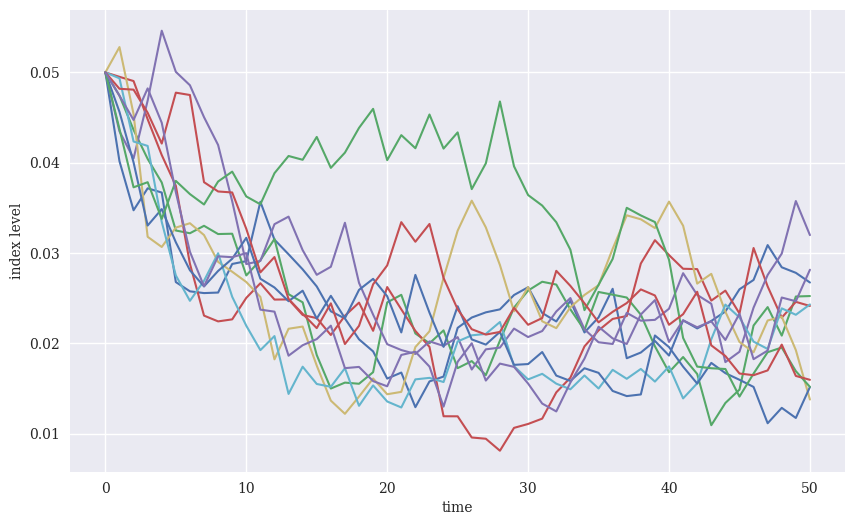

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

이 확률 과정을 완벽하게 이산화 시뮬레이션하려면 다음과 같습니다. 아래 수식은 제곱근 확산 모형을 자유도 $df = \frac{4\theta\kappa}{\sigma^2}$와 비중심 인수 $nc = \frac{4\kappa e^{-\kappa\Delta t}}{\sigma^2\left(1-e^{-k\Delta t}\right)}x_s$를 가진 비중심 카이 제곱 분포로 표현한 것입니다.  
$$x_t=\frac{\sigma^2\left(1-e^{-k\Delta t}\right)}{4\kappa}\chi_d^2\left(\frac{4\kappa e^{-\kappa\Delta t}}{\sigma^2\left(1-e^{-k\Delta t}\right)}x_s\right)$$  
이 이산화 과정을 파이썬으로 구현하면 복잡해지긴 하지만 여전히 간결한 형태입니다. 다음 그림은 정확한 이산화 방식에 따른 시뮬레이션 결과 히스토그램입니다.

In [28]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x

In [29]:
x2 = srd_exact()

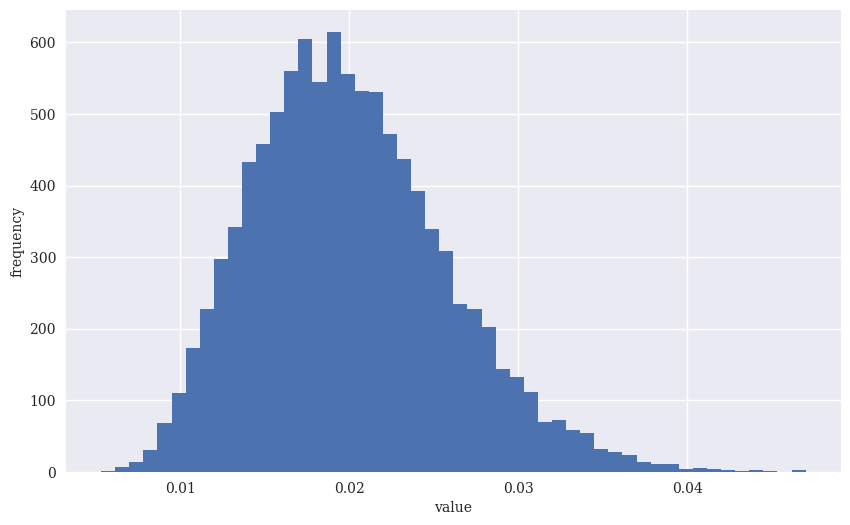

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

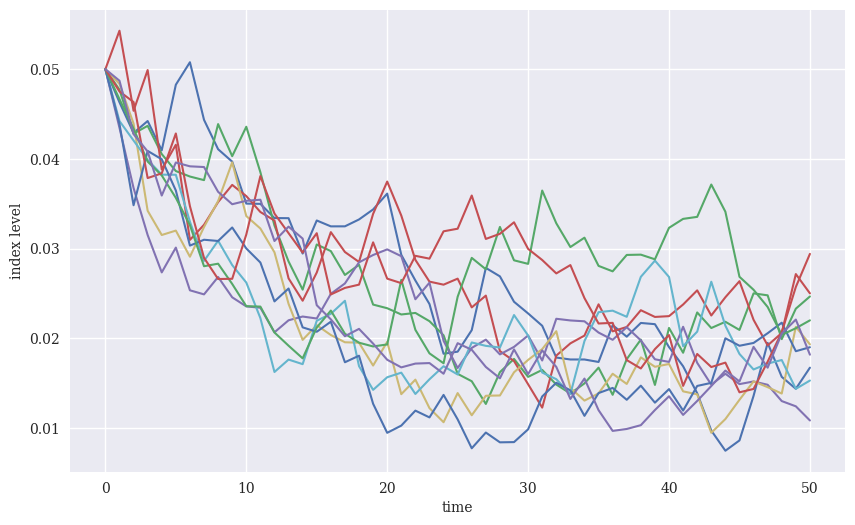

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

이산화 방식에 따른 차이를 살펴보면 편향 오차를 지닌 오일러 방식도 통계치만 봤을 때는 괜찮은 성능을 보이고 있습니다.

In [32]:
print_statistics(x1[-1], x2[-1])

statistic      data set 1     data set 2    
---------------------------------------------
size                10000.000      10000.000
min                     0.003          0.005
max                     0.049          0.047
mean                    0.020          0.020
std                     0.000          0.000
skew                    0.529          0.532
kurtosis                0.289          0.273


In [33]:
I = 250000
%time x1 = srd_euler()

CPU times: total: 938 ms
Wall time: 928 ms


In [34]:
%time x2 = srd_exact()

CPU times: total: 1.5 s
Wall time: 1.56 s


In [35]:
print_statistics(x1[-1], x2[-1])

statistic      data set 1     data set 2    
---------------------------------------------
size               250000.000     250000.000
min                     0.002          0.003
max                     0.071          0.055
mean                    0.020          0.020
std                     0.000          0.000
skew                    0.563          0.579
kurtosis                0.492          0.520


실행 속도 면에서는 비중심 카이 제곱 분포에서 직접 샘플링하는 방식이 표준정규분포를 이용하는 것보다 계산 부담이 큽니다. 정확한 이산화 방법은 오일러 방식을 이용한 경우에 비해 약 1.5배의 시간이 걸립니다.

#### 확률적 변동성 모형
블랙-숄즈-머튼 모형의 최대 단순 가정 중 하나는 변하지 않는 변동성입니다. 그러나 일반적으로 변동성은 고정되어 있지도 않고 결정론적이지 않은 확률적인 값입니다. 1990년대 금융공학 모형의 가장 큰 진전은 이른바 **확률적 변동성 모형**(stochastic volatility model)을 도입한 것입니다. 이 중 인기 있는 모형 가운데 하나는 아래 수식에 나오는 헤스톤(Heston) 모형(1993)입니다.  
$$\mathrm{d}S_t=rS_t\mathrm{d}t + \sqrt{v_t}S_t\mathrm{d}Z_t^1$$  
$$\mathrm{d}v_t = \kappa_v\left(\theta_v-v_t\right)\mathrm{d}t+\sigma_v\sqrt{v_t}\mathrm{d}Z_t^2$$  
$$\mathrm{d}Z_t^1\mathrm{d}Z_t^2=\rho$$  
각 변수와 인수의 의미는 기하 브라운 운동 모형이나 제곱근 확산 모형의 설명에서 쉽게 유추할 수 있을 겁니다. 인수 $\rho$는 두 표준 브라운 운동 $Z_t^1$, $Z_t^2$의 순간 상관계수(instantaneous correlation)를 나타냅니다. 상관계수를 통해 시장이 하락할 때 변동성이 증가하고 시장이 상승할 때 변동성이 감소하는 이른바 레버리지 효과(leverage effect)를 설명하는 것이 가능합니다.  
이 모형에 대해 다음과 같은 인수값을 가정합니다. 두 확률 과정의 상관관계를 구하려면 상관계수 행렬(correlation matrix)에 대한 Cholesky 분해가 필요합니다.

In [36]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6 # 두 브라운 운동의 고정 상관계수
T = 1.0

In [37]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

In [38]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

확률 과정 시뮬레이션을 시작하기에 앞서 시뮬레이션에 사용될 난수를 미리 생성합니다. 집합 0은 주가의 확률 과정, 집합 1은 변동성의 확률 과정에 사용합니다. 제곱근 확산 모형에 기반한 변동성 과정에 대해서는 상관관계를 고려한 오일러 이산화 방식을 사용합니다.

In [39]:
M = 50
I = 10000
dt = T / M

In [40]:
ran_num = npr.standard_normal((2, M + 1, I)) # 3차원 난수 데이터 생성

In [41]:
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)

In [42]:
v[0] = v0
vh[0] = v0

In [43]:
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] +
             kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
             sigma * np.sqrt(np.maximum(vh[t - 1], 0)) *
             math.sqrt(dt) * npr.standard_normal(I))

In [44]:
v = np.maximum(vh, 0)

주가 과정도 마찬가지로 상관관계를 고려하고 기하 브라운 운동에 대해 정확한 형태의 오일러 방식으로 이산화합니다. 아래 그림은 주가와 변동성 두 확률 과정을 시뮬레이션한 결과 히스토그램입니다.

In [45]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                             np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

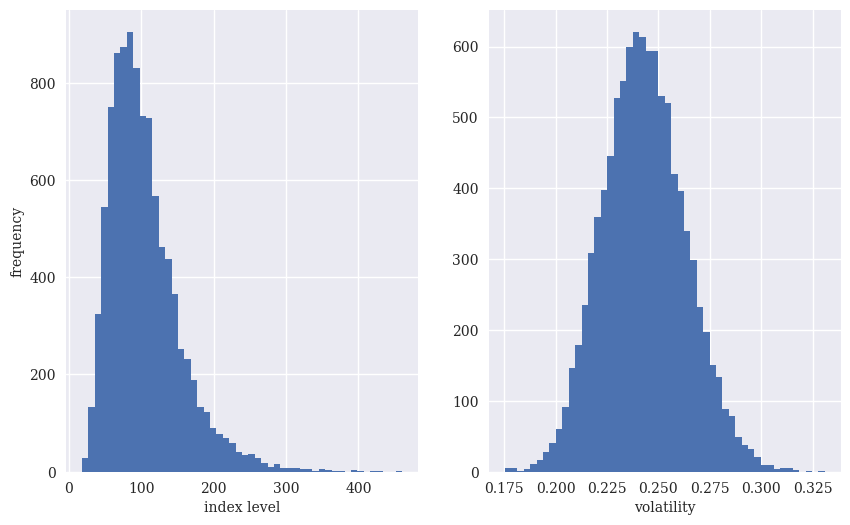

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility');

이 코드를 보면 왜 제곱근 확산 모형에 오일러 방식을 사용하는 것이 좋은지 알 수 있습니다. 오일러 방식을 사용하면 표준정규분포를 사용하므로 샘플 생성 시 **상관관계를 간단하고 일관적으로 적용**할 수 있습니다. 만약 주가 과정에는 오일러 방식을 사용하고 변동성 과정에는 비중심 카이 제곱에 기반한 방식을 사용한다면 상관관계를 일관성 있게 적용하기 어렵습니다.  
각 확률 과정의 시뮬레이션 경로를 10개씩 살펴보면, 변동성 과정은 양의 표류 과정 경향을 보이며 $\theta=0.25$로 수렴합니다.

In [47]:
print_statistics(S[-1], v[-1])

statistic      data set 1     data set 2    
---------------------------------------------
size                10000.000      10000.000
min                    18.065          0.175
max                   460.349          0.331
mean                  104.667          0.243
std                  2412.031          0.000
skew                    1.430          0.187
kurtosis                3.499          0.045


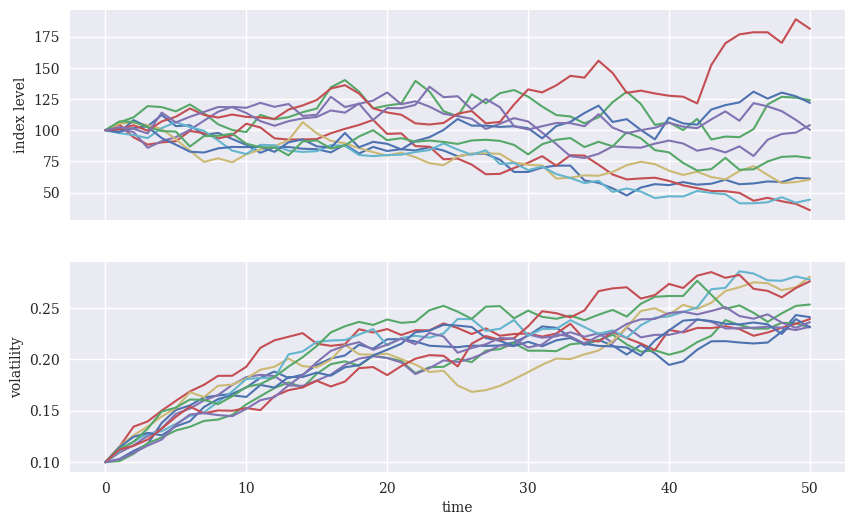

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility');

마지막으로 두 자료의 통계치를 살펴보면 주가 과정은 최대값이 기하 브라운 운동 모형보다 큰 것을 알 수 있습니다. 이는 다른 조건은 같은데 변동성이 고정되지 않고 지속적으로 증가했기 때문입니다.

#### 점프 확산
확률적 변동성과 레버리지 효과는 대다수의 시장에서 관찰할 수 있는 특징적인 현상입니다. 시장에서 볼 수 있는 또 하나의 특징은 자산 가격이나 변동성이 점프하는 현상입니다. 1976년 머튼은 로그 정규분포에 점프 요인을 더하여 블랙-숄즈-머튼 모형을 개선한 점프 확산(jump diffusion) 모형을 발표했습니다. 이 모형의 위험 중립 SDE는 아래와 같습니다.  
$$\mathrm{d}S_t=\left(r-r_J\right)S_t\mathrm{d}t+\sigma S_t\mathrm{d}Z_t+J_tS_t\mathrm{d}N_t$$
($S_t$: 시간 $t$에서의 주가, $r$: 고정 무위험 단기 이자율, $r_J\equiv\lambda\cdot\left(e^{\mu_J+\delta^2/2}-1\right)$: 점프의 위험 중립성을 보존하기 위한 표류계수 수정항, $\sigma$: $S$의 고정 변동성, $Z_t$: 표준 브라운 운동, $J_t$: 시간 $t$에서의 점프(분포: $\log{\left(1+J_t\right)}\approx N\left(\log{\left(1+\mu_J\right)}-\frac{\delta^2}{2}, \delta^2\right)$, $N$은 표준정규분포의 누적분포함수), $N_t$: 점프 강도 $\lambda$를 가지는 푸아송 과정.)  
아래 수식은 점프 확산 모형의 오일러 이산화 결과입니다. $z_t^{\mathrm{n}}$는 표준정규분포, $y_t$는 인수 $\lambda$를 가지는 푸아송 분포입니다.  
$$S_t = S_{t-\Delta t}\left(e^{\left(r-r_J-\sigma^2/2\right)\Delta t+\sigma\sqrt{\Delta t}z_t^1}+\left(e^{\mu_J+\delta z_t^2}-1\right)\right)y_t$$  
주어진 이산화 과정을 따르고 다음과 같은 인수값을 적용합니다.

In [49]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75 # 점프 강도
mu = -0.6 # 평균 점프 크기
delta = 0.25 # 점프 변동성
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1) # 표류계수 추정치

In [50]:
T = 1.0
M = 50
I = 10000
dt = T / M

점프 확산 모형을 시뮬레이션하려면 세 개의 독립적인 난수 집합이 필요합니다. 다음 그림을 보면 점프로 인한 두 번째 피크(두 개의 최고점 분포)가 있는 것을 볼 수 있습니다.

In [51]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +
                              sigma * math.sqrt(dt) * sn1[t]) +
                       (np.exp(mu + delta * sn2[t]) - 1) *
                       poi[t]) # 정확한 오일러 방식에 따른 시뮬레이션
    S[t] = np.maximum(S[t], 0)

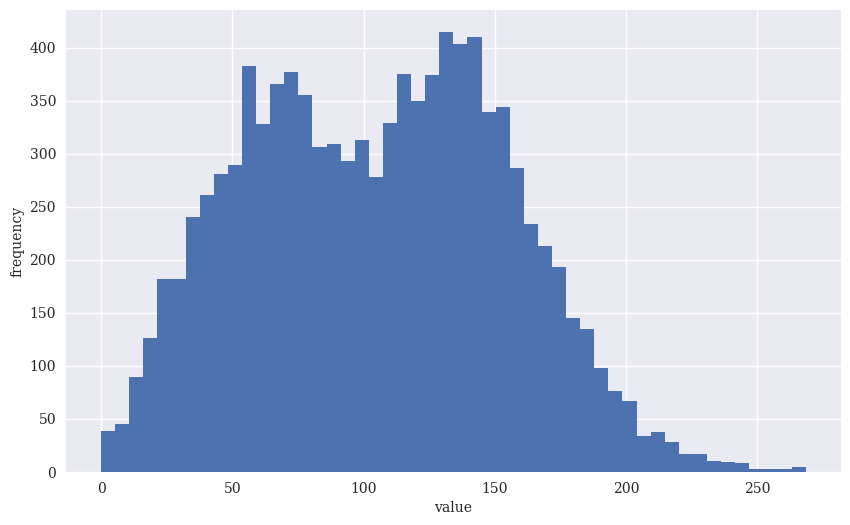

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

주가가 아래쪽으로 점프하는 현상은 아래 그림에 보인 10개의 시뮬레이션 경로에서도 볼 수 있습니다.

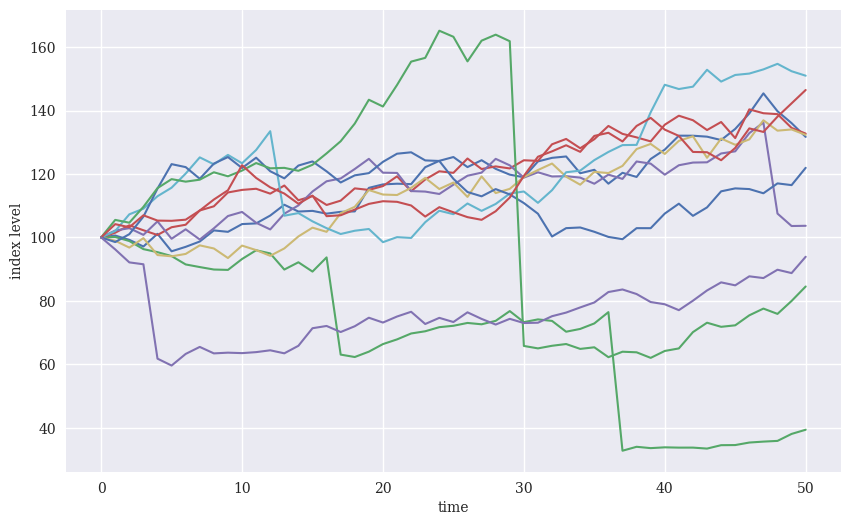

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

### 12.2.3 분산 감소
지금까지 우리가 사용한 파이썬 함수는 **의사 난수**를 생성하고 샘플의 수도 계속 달라지기 때문에 결과로 나온 숫자들이 우리가 기대하거나 원했던 통계적 특성을 충분하게 보이지 않을 수 있습니다. 예를 들어 평균이 0이고 표준편차가 1인 표준정규분포를 만들려고 할 때 실제 생성된 난수들이 어떤 통계치를 보이는지 살펴봅시다. 정확한 비교를 위해 난수 생성기의 시드값(seed value)을 고정시킵니다.

In [54]:
print(f"{'Mean'} {'Std. Deviation'}")
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print(f"{sn.mean():15.12f} {sn.std():15.12f}")

Mean Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


In [55]:
i ** 2 * 10000

8410000

결과를 보면 샘플 숫자가 클수록 통계치가 나아지는 것을 알 수 있습니다(큰 수의 법칙에 따름). 하지만 난수의 수가 8백만 개가 넘는 가장 큰 샘플에서도 우리가 원하는 수준에는 도달하지 못했습니다.  
다행스럽게도 표준정규분포의 처음 두 모멘트 값을 개선하고 어렵지 않게 구현할 수 있는 분산 감소(variance reduction) 방법이 있습니다. 첫 번째 방법은 **대조 변수**(antithetic variates)를 사용하는 것입니다. 이 방법은 난수를 원하는 수의 절반만큼만 생성하고 생성된 숫자의 부호를 반대로 한 난수를 추가하는 방법입니다. 예를 들어, 난수 생성기에 해당하는 파이썬 함수가 0.5를 만들면 -0.5를 난수 집합에 포함하는 것입니다. 이 방법을 쓰면 평균값이 정확히 0이 됩니다. 단, 이 방법은 우리가 계속 사용할 표준정규분포처럼 중간값이 0인 대칭 확률변수에만 적용할 수 있습니다.  
넘파이에서는 `np.concatenate()` 함수로 구현할 수 있습니다.

In [56]:
sn = npr.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn))

In [57]:
np.shape(sn)

(10000,)

In [58]:
sn.mean()

2.842170943040401e-18

In [59]:
print(f"{'Mean':15s} {'Std. Deviation':15s}")
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * (10000 // 2))
    sn = np.concatenate((sn, -sn))
    print(f"{sn.mean():15.12f} {sn.std():15.12f}")

Mean            Std. Deviation 
-------------------------------
-0.000000000000  1.017474904235
 0.000000000000  0.998944776883
 0.000000000000  0.998018870658
 0.000000000000  0.997916558845
-0.000000000000  0.998119811838
 0.000000000000  0.998365584578
 0.000000000000  0.998171301115
-0.000000000000  0.998359568664
-0.000000000000  0.998772594780
-0.000000000000  0.998640403762
 0.000000000000  0.998868127277
 0.000000000000  0.999102053335
 0.000000000000  0.999342143561
 0.000000000000  0.999449673443
-0.000000000000  0.999613960655


눈치챘겠지만 이 방법을 쓰면 1차 모멘트(평균)를 정확하게 맞출 수 있습니다. 하지만 이 방법은 2차 모멘트인 표준편차에는 영향을 미치지 않습니다. 이 목적을 위해서는 **모멘트 정합**(moment matching)이라고 부르는 다른 분산 감소 방법을 사용할 수 있습니다.

In [60]:
sn = npr.standard_normal(10000)

In [61]:
sn.mean()

-0.013148607924394772

In [62]:
sn.std()

0.9957095998697798

In [63]:
sn_new = (sn - sn.mean()) / sn.std() # 1차, 2차 모멘트를 한꺼번에 수정

In [64]:
sn_new.mean()

-1.4210854715202004e-18

In [65]:
sn_new.std()

1.0

모든 난수에서 샘플 평균을 빼고 샘플 표준편차로 나누면 우리가 원하던 바와 같이 표준정규분포의 1차와 2차 모멘트를 거의 정확하게 만족시키는 난수의 집합을 구할 수 있습니다.  
다음은 각각의 분산 감소 방법을 이용하여 표준정규분포를 따르는 난수를 생성하는 함수입니다.

In [66]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    '''Function to generate random numbers for simulation.
    
    인수
    ===============
    M: int
        number of time intervals for discretization
    I: int
        number of paths to be simulated
    anti_paths: boolean
        use of antithetic variates
    mo_math: boolean
        use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, I // 2))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    
    return sn

> **NOTE**_ 벡터화와 시뮬레이션
넘파이를 사용한 벡터화는 파이썬에서 몬테카를로 시뮬레이션 알고리즘을 구현하는 자연스럽고 간결하며 효율적인 방법입니다. 하지만 넘파이 벡터화는 일반적으로 메모리 사용량이 큽니다. 이를 대체하는 방법에 대해서는 10장을 참고합니다.

## 12.3 가치 평가
몬테카를로 시뮬레이션의 가장 중요한 응용은 옵션, 파생상품, 하이브리드 상품 등의 **조건부 청구권**(contingent claims)의 가치를 평가하는 것입니다. 쉽게 말하면 조건부 청구권의 가치는 위험 중립 또는 마틴게일 척도(risk-neutral (martingale) measure) 하에서 기대 페이오프를 할인한 것과 같습니다. 위험 중립 측도는 주식, 지수 등의 모든 위험 요인이 무위험 단기 이자율에 따라 증가하도록 하여 할인된 확률 과정이 마틴게일이 되게 하는 확률 측도입니다. 자산 가격결정 기본 정리(fundamental theorem of asset pricing)에 따르면 위험 중립 측도의 존재는 무위험 차익 거래의 부존재(absense of arbitrage)와 같습니다.  
금융 옵션은 지정된 금융 상품을 특정한 만기일(유러피안 옵션) 또는 특정한 기간 동안(아메리칸 옵션) 행사가라는 주어진 가격에 사거나(콜 옵션) 팔(풋 옵션) 수 있는 권리를 가집니다.  
우선 가치 평가 면에서 더 간단한 유러피안 옵션부터 살펴봅시다.

### 12.3.1 유러피안 옵션
유러피안 콜 옵션의 만기 페이오프는 $h\left(S_T\right)\equiv\max{\left(S_T-K,0\right)}$로 주어집니다. 여기에서 $S_T$는 만기에서의 주가고 $T$는 만기, $K$는 행사가입니다. 만약 (기하 브라운 운동 등의) 관련 확률 과정에 대한 위험 중립 측도가 존재한다면(이를 완전 시장이라고 합니다) 이 옵션의 가격은 아래 수식과 같이 주어집니다.  
$$C_0=e^{-rT}\mathbf{E}_0^Q\left(h\left(S_T\right)\right)=e^{-rT}\int_o^{\infty} h\left(s\right)q\left(s\right)ds$$  
11장에서 몬테카를로 시뮬레이션을 이용한 적분의 수치 계산에 대해 대략적으로 다루었습니다. 이 방법을 위 수식에 적용해보겠습니다. 아래 수식이 유러피안 옵션을 몬테카를로 방식으로 추정하는 방법입니다. $\tilde{S}_T^i$는 시뮬레이션된 만기 주가입니다.  
$$\tilde{C}_0=e^{-rT}\frac{1}{I}\sum_{i=1}^l h\left(\tilde{S}_T^i\right)$$  
다음과 같은 기하 브라운 운동 인수값이 주어졌을 때 행사가를 인수로 받아 가치를 계산하는 `gbm_mcs_stat()` 함수를 만듭니다. 여기에서는 만기 주가만 시뮬레이션합니다. 행사가 $K=105$인 경우를 계산해봅시다.

In [67]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

In [68]:
def gbm_mcs_stat(K):
    '''몬테카를로 시뮬레이션에 의한 유러피안 콜 옵션의 가치 평가
    
    인수
    ===================
    K: float
        (양의) 옵션 행사가
    
    반환값
    ===================
    C0: float
        유러피안 콜 옵션의 현재 추정 가치
    '''
    sn = gen_sn(1, I)
    
    # 만기에서의 지수 수준 시뮬레이션
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
                     sigma * math.sqrt(T) * sn[1])
    
    # 만기에서의 페이오프 계산
    hT = np.maximum(ST - K, 0)
    
    # 몬테카를로 시뮬레이션 계산
    C0 = math.exp(-r * T) * np.mean(hT)
    
    return C0

In [69]:
gbm_mcs_stat(K=105.)

9.989580283195204

그 다음은 동적인 시뮬레이션 방식으로 유러피안 풋 옵션의 가치를 평가합니다. `gbm_mcs_dyna()` 함수로 이 알고리즘을 구현합니다. 그리고 행사가가 같은 풋 옵션의 가격 추정치를 비교합니다.

In [70]:
M = 50 #

In [71]:
def gbm_mcs_dyna(K, option='call'):
    '''몬테카를로 시뮬레이션에 의한 유러피안 옵션의 가치 평가
    
    인수
    ===================
    K: float
        (양의) 옵션 행사가
    option: string
        가치를 평가할 옵션의 유형 ('call', 'put')
    반환값
    ===================
    C0: float
        유러피안 콜 옵션의 현재 추정 가치
    '''
    
    dt = T / M
    # 지수 수준의 시뮬레이션
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                 sigma * math.sqrt(dt) * sn[t])
    
    # 옵션 유형에 따른 페이오프 계산
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    
    # 몬테카를로 시뮬레이션 계산
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [72]:
gbm_mcs_dyna(K=110., option='call')

8.095116309103307

In [73]:
gbm_mcs_dyna(K=110., option='put')

12.66095953762521

문제는 이렇게 시뮬레이션 방식으로 계산한 값이 블랙-숄즈-머튼 가치 평가 공식으로 계산한 벤치마크값과 얼마나 일치하느냐입니다. 이를 알아보기 위해 `bsm_functions.py` 모듈(12.5절 참고)의 블랙-숄즈-머튼 해석 공식을 사용하여 다양한 행사가에 대한 상대적인 옵션 가격을 계산합니다.  
먼저 정적인 시뮬레이션 방식을 사용하여 구한 값을 해석해와 비교합니다.

In [74]:
from bsm_functions import bsm_call_value

In [75]:
stat_res, dyna_res, anal_res = [], [], []
k_list = np.arange(80., 120.1, 5.) # 행사가 범위에 대한 ndarray 객체 생성
np.random.seed(100)

In [76]:
# 모든 행사가에 대한 옵션 가치를 시뮬레이션/계산
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))

In [77]:
# list 객체를 ndarray 객체로 변환
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

아래 그림을 보면 모든 오차가 절대값 1% 이하입니다. 음의 오차와 양의 오차가 모두 존재합니다.

<Figure size 1000x600 with 0 Axes>

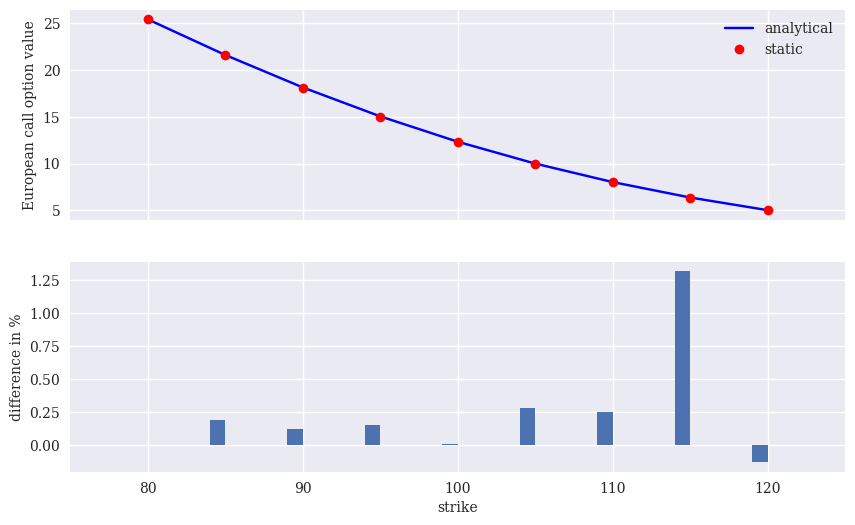

In [78]:
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
plt.show()

동적 시뮬레이션 결과에 대해 같은 방식으로 그림에 표시했습니다. 여기에서도 모든 오차가 1% 이하이고 양과 음의 오차가 모두 존재합니다. 일반적으로 몬테카를로 추정치의 품질은 시간 간격의 수 $M$과 시뮬레이션 경로의 수 $I$를 바꾸어 조절할 수 있습니다.

<Figure size 1000x600 with 0 Axes>

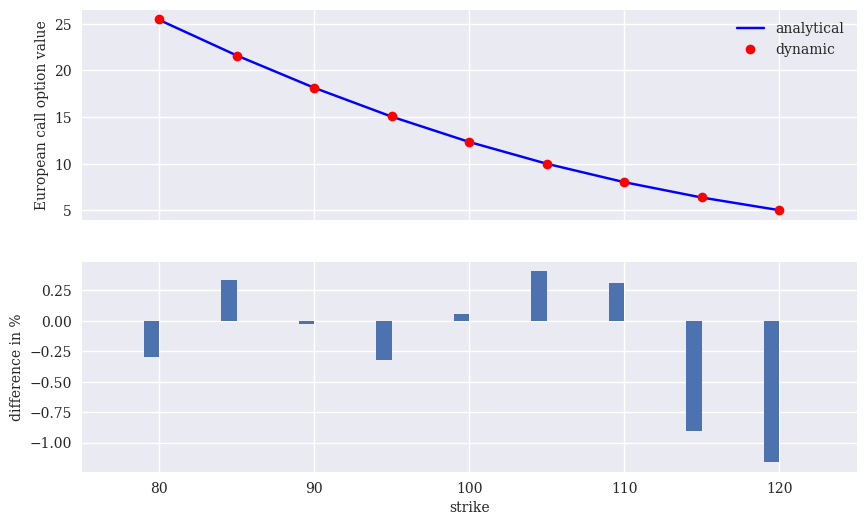

In [79]:
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
plt.show()

### 12.3.2 아메리칸 옵션
아메리칸 옵션을 평가하는 것은 유러피안 옵션보다 더 복잡합니다. 이 경우에는 옵션 가치 계산과 관련하여 **최적 정지 문제**(optimal stopping problem)를 풀어야 합니다. 아래 수식은 아메리칸 옵션의 가치 평가 수식입니다. 이 문제는 시뮬레이션 상에서 이산 시간 그리드를 사용하여 풀 수 이습니다. 이렇게 하면 사실 아메리칸 옵션이 아니라 특정 그리드 점에서 행사가 가능한 버뮤다 옵션 문제를 푸는 셈이지만 시간 그리드의 간격을 좁히면 아메리칸 옵션으로 수렴합니다.  
$$V_0=\sup_{\tau\in\left\{0,\Delta t, 2\Delta t,\cdots , T\right\}}e^{-rT}\mathbf{E}_0^Q\left(h_{\tau}\left(S_{\tau}\right)\right)$$  
다음에 설명하는 알고리즘은 Longstaff and Schwartz (2001)의 논문에 나온 **최소 자승 몬테카를로**(Least-Square Monte Carlo, LSM) 방법입니다. 특정한 시간 $t$에 아메리칸(혹은 버뮤다) 옵션의 가치는 $V_t\left(S\right)=\max{\left(h_t\left(s\right),C_t\left(s\right)\right)}$와 같이 주어집니다. 여기에서 $C_t\left(s\right)=\mathbf{E}_t^Q\left(e^{-r\Delta t}V_{t+\Delta t}\left(S_{t+\Delta t}\right)|S_t=s\right)$는 주가 $S_t=s$에서의 옵션 보유 가치(continuation value)라고 합니다.  
주가를 $M$개의 동일 시간 간격 $\Delta t$로 시뮬레이션한 경로가 있다고 해보겠습니다.  
$Y_{t,i}\equiv e^{-r\Delta t}V_{t+\Delta t, i}$는 시간 $t$에서 경로 $i$에 대해 시뮬레이션한 보유 가치입니다. 이 값을 계산하려면 다음 시간 단계의 보유 가치를 모든 주가에 대해 알아야 합니다. 최소 자승 몬테카를로 방법은 같은 시간대의 모든 보유 가치 시뮬레이션 값을 계산하기 위해 최소 자승 회귀법을 사용합니다.  
기저 함수 집합 $b_d$, $d=1,\cdots, D$가 주어지면 보유 가치는 $\hat{C}_{t, i}=\sum_{d=1}^D \alpha_{d, t}^{\ast}\cdot b_d\left(S_{t, i}\right)$와 같이 회귀 분석으로 주어집니다. 여기에서 회귀 인수 $\alpha^{\ast}$는 아래 수식에 따른 최소 자승 회귀법으로 구합니다.  
$$\min_{\alpha_{1, t}, \cdots, \alpha_{D, t}}=\frac{1}{I}\sum_{i=1}^{I}\left(Y_{t,i}-\sum_{d=1}^{D}\alpha_{d,t}\cdot b_d\left(S_{t,i}\right)\right)^2$$  
함수 `gbm_mcs_amer()`에 아메리칸 콜 옵션과 풋 옵션 가치를 계산하기 위한 LSM 알고리즘을 구현했습니다.

In [80]:
def gbm_mcs_amer(K, option='call'):
    '''LMS 알고리즘을 이용한 몬테카를로 시뮬레이션을 이용한 아메리칸 옵션의 가치 평가
    
    인수
    =================
    K: float
        (양의) 옵션 행사가
    option: string
    가치 평가할 옵션의 유형 ('call', 'put')
    
    반환값
    =================
    C0: float
        옵션의 현재 가치 추정치
    '''
    dt = T / M
    df = math.exp(-r * dt)
    
    # 지수 수준의 시뮬레이션
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + 
                                 sigma * math.sqrt(dt) * sn[t])
    
    # 옵션 유형에 따른 페이오프 계산
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    
    # LMS 알고리즘
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    
    # 몬테카를로 시뮬레이션에 의한 추정치
    C0 = df * np.mean(V[1])
    
    return C0

In [81]:
gbm_mcs_amer(110., option='call')

7.721705606305353

In [82]:
gbm_mcs_amer(110., option='put')

13.609997625418051

유러피안 옵션 가치는 아메리칸 옵션 가치의 하한(lower bound)이 됩니다. 두 옵션 가치의 차이는 **조기 행사 프리미엄**(early exercise premium)이라고 부릅니다. 다음 코드에서 여러 가지 행사가에 따른 유러피안 옵션과 아메리칸 옵션의 가치를 비교하여 조기 행사 프리미엄을 추정합니다. 이 분석에는 풋 옵션을 사용했습니다.

In [83]:
euro_res = []
amer_res = []

In [84]:
k_list = np.arange(80., 120.1, 5.)

In [85]:
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))

In [86]:
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

아래 그림을 보면 행사가에 따라 조기 행사 프리미엄이 10%까지도 올라가는 것을 볼 수 있습니다.

<Figure size 1000x600 with 0 Axes>

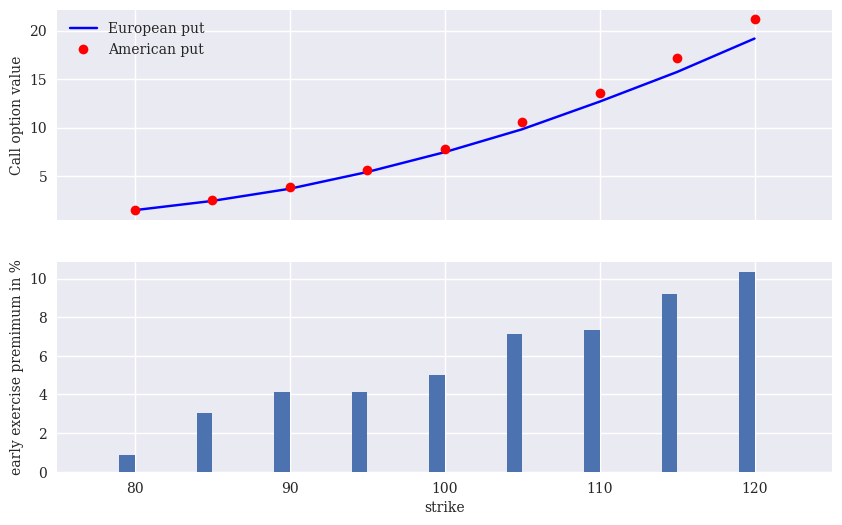

In [87]:
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('Call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premimum in %')
ax2.set_xlim(left=75, right=125)
plt.show()

## 12.4 위험 측도
가치 평가 이외에 확률 과정 시뮬레이션의 중요한 응용 분야 중 하나는 **위험 관리**(risk management)입니다. 이 절에서는 오늘날 금융산업에서 가장 널리 쓰이는 두 가지 위험 측도를 계산/추정하는 법을 설명합니다.

### 12.4.1 VaR
VaR(Value-at-Risk)는 가장 널리 사용되지만 동시에 가장 논란이 많은 위험 측도입니다. 직관적이기 때문에 실무에서는 사랑받지만, 이론적 기반 특히 다음에 설명할 **테일 리스크**(tail risk)를 제대로 파악하지 못한다는 점에서 많은 비판을 받습니다. VaR을 한마디로 설명하면 어떤 확률적인 신뢰도 하에서 특정 시간 내에 발생할 수 있는 화폐(달러, 유로, 엔 등)로 환산한 포트폴리오나 단일 포지션의 손실 가능 금액을 말합니다.  
만약 지금 백만 달러짜리 주식 포지션의 99% 신뢰도 30일(1개월) VaR 값이 5만 달러라면, 30일 동안의 이 포지션에서 이후에 발생할 수 있는 손실은 99%의 확률로 5만 달러를 넘지 않는다는 의미입니다. 이는 30일 기간 내의 손실이 절대로 5만 달러를 넘지 않는다는 말이 아닙니다. 단지 5만 달러 이상의 손실을 볼 확률이 1%라는 의미일 뿐입니다.  
다음과 같은 인수를 가지는 블랙-숄즈-머튼 모형에 기반하여 $T=30/365$(30일)라는 미래의 주가를 시뮬레이션해보겠습니다. VaR 값을 추정하려면 시뮬레이션 상의 손익을 현재 가치와 비교하여 가장 큰 손실부터 가장 큰 수익까지 순서대로 정렬합니다. 아래 그림은 시뮬레이션 성과 히스토그램입니다.

In [88]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000

In [89]:
# 기하 브라운 운동의 만기 값 시뮬레이션
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
                 sigma * np.sqrt(T) * npr.standard_normal(I))

In [90]:
# 시뮬레이션 손익 계산 및 정렬
R_gbm = np.sort(ST - S0)

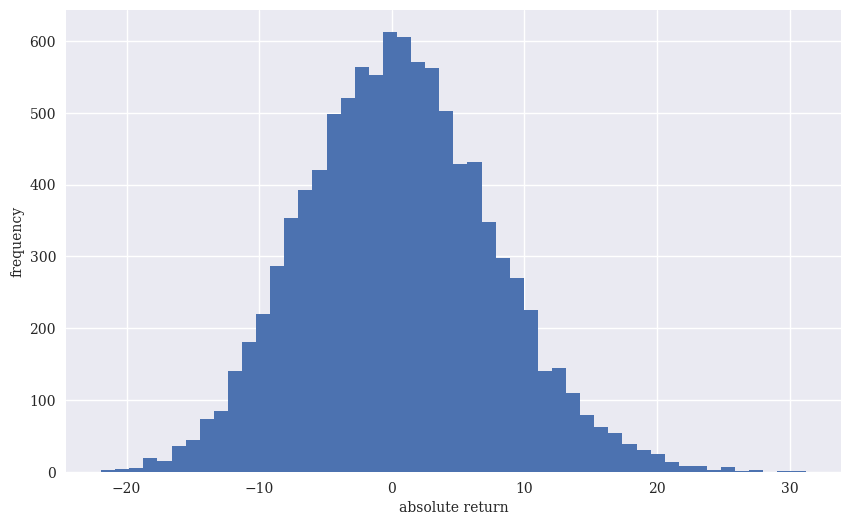

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');

정렬된 결과를 담은 `ndarray` 객체만 있으면 나머지 작업은 `scs.scoreatpercentile()` 함수에 맡기면 됩니다.  
우리가 추가로 해야 할 일은 관심 있는 백분위수(percentile)를 정하고 넘겨주는 것뿐입니다. 리스트 객체 `percs`의 값 0.1은 100% - 0.1% = 99.9% 신뢰도를 의미합니다. 신뢰도 99.9%를 지닌 30일 VaR 값은 이 경우 18.8입니다. 만약 신뢰도가 90%라면 이 값은 8.5가 됩니다.

In [93]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print(f"{'Confidence level':16s} {'Value-at-Risk':16s}")
print(33 * '-')
for pair in zip(percs, var):
    print(f"{100 - pair[0]:16.2f} {-pair[1]:16.3f}")

Confidence level Value-at-Risk   
---------------------------------
           99.99           21.814
           99.90           18.837
           99.00           15.230
           97.50           12.816
           95.00           10.824
           90.00            8.504


두 번째 예제로 머튼의 점프 확산 모형을 동적으로 시뮬레이션합니다. 이 경우에는 점프 요인이 음수이므로 아래 그림에 보인 것처럼 시뮬레이션 손익은 양봉(bimodal) 분포와 유사한 모습을 보입니다. 정규분포 관점에서 보면 상당한 좌측 팻 테일(fat tail)을 가집니다.

In [94]:
dt = 30. / 365 / M
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [95]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                              + sigma * math.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

In [96]:
R_jd = np.sort(S[-1] - S0)

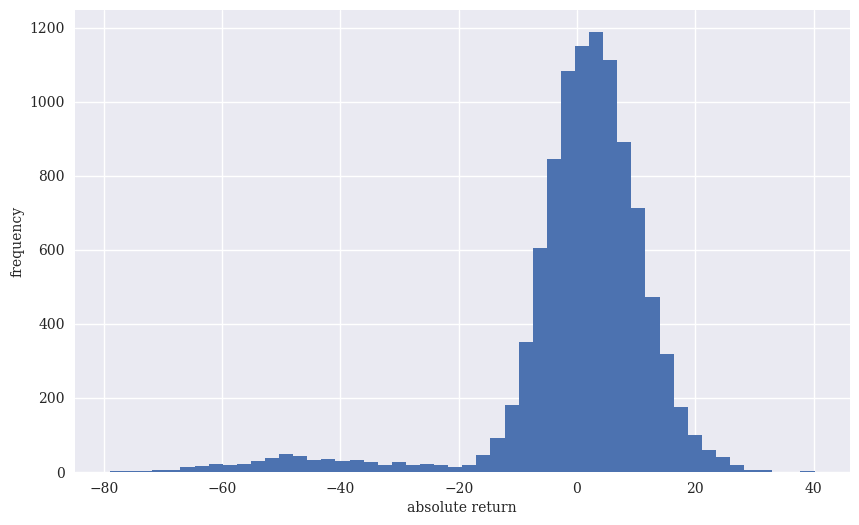

In [98]:
plt.figure(figsize=(10, 6))
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');

이 시뮬레이션 결과에서 90% 신뢰도를 가진 30일 VaR 값은 이전의 결과와 거의 동일합니다. 하지만 99% 신뢰도의 VaR 값은 기하 브라운 운동 모형의 **세 배** 이상입니다(70 대 18.8).

In [99]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print(f"{'Confidence level':16s} {'Value-at-Risk':16s}")
print(33 * '-')
for pair in zip(percs, var):
    print(f"{100 - pair[0]:16.2f} {-pair[1]:16.3f}")

Confidence level Value-at-Risk   
---------------------------------
           99.99           76.520
           99.90           69.396
           99.00           55.974
           97.50           46.405
           95.00           24.198
           90.00            8.836


이 결과는 표준적인 VaR 측도로 금융 시장에서 종종 발생하는 테일 리스크를 포착하지 못하는 문제를 보여줍니다.  
이 점을 더 설명하기 위해 두 경우를 시각적으로 비교했습니다. 아래 그림에서 VaR 측도는 전혀 다른 신뢰 구간을 보입니다.

In [100]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

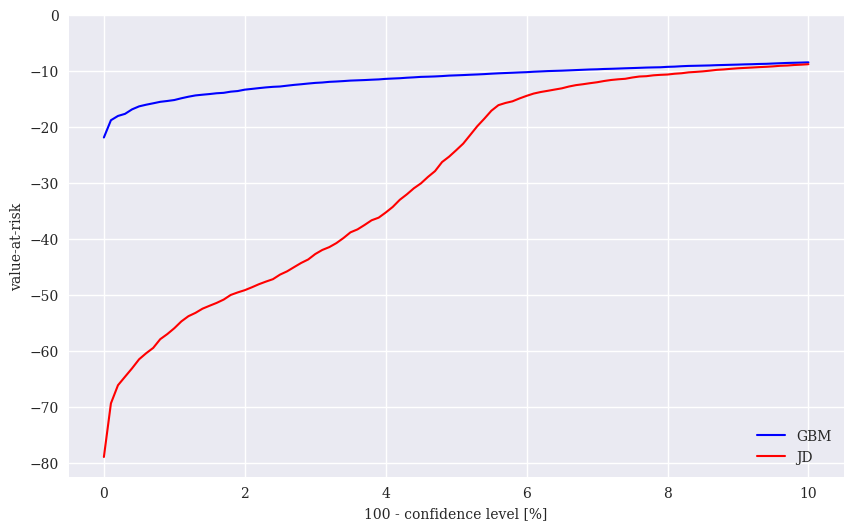

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.ylim(ymax=0.0);

### 12.4.2 CVA
또다른 위험 측도는 신용 VaR에서 파생된 CVA(Credit Value Adjustment)입니다. 신용 VaR은 거래 상대방이 이행의무를 다하지 않을 수 있는 가능성(예를 들면 거래 상대방의 파산 가능성)을 고려한 위험 측도입니다. 파산의 경우 **부도 확률**과 **손실 수준**의 두 가지 가정이 필요합니다.  
좀 더 구체적으로 다음과 같은 인수를 가지는 블랙-숄즈-머튼 모형을 다시 생각해보죠. 가장 단순한 경우로 손실 수준 $L$과 거래 상대방의 부도 확률 $p$가 고정되어 있다고 합시다. 부도 시나리오는 푸아송 분포를 이용하여 다음과 같이 생성합니다. 이때 부도는 한 번만 발생할 수 있습니다.

In [102]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

In [103]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T
                 + sigma * np.sqrt(T) * npr.standard_normal(I))

In [104]:
L = 0.5 # 손실 수준

In [105]:
p = 0.01 # 부도 확률

In [106]:
D = npr.poisson(p * T, I) # 부도 사건 시뮬레이션

In [107]:
D = np.where(D > 1, 1, D) # 값을 1로 제한

부도가 발생하지 않은 경우 위험 중립 측도 하에 미래의 주가지수는 해당 자산의 현재 가치와 같아야 합니다(수치적으로 발생하는 오차는 제외). 이 가정하에서 신용 VaR는 다음과 같이 계산합니다.

In [108]:
math.exp(-r * T) * np.mean(ST) # 시간 T에서 시뮬레이션된 평균 할인 자산 가치

99.94767178982691

In [109]:
CVaR = math.exp(-r * T) * np.mean(L * D * ST) # CVaR은 부도 시 평균 할인 미래 손실
CVaR

0.4883560258963962

In [111]:
# 시간 T에서 시뮬레이션된 평균 할인 자산 가치(부도 손실을 감안하여 조정)
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)
S0_CVA

99.45931576393053

In [112]:
# 시뮬레이션된 CVaR로 조정된 자산의 현재 가격
S0_adj = S0 - CVaR
S0_adj

99.5116439741036

이 시뮬레이션 예에서는 신용 위험에 의한 손실이 약 1000회 발생하는데, 이는 전체 10만 개의 시뮬레이션 경로 중 처음 가정했던 부도 확률 1%와 일치합니다. 다음 그림에는 부도로 인한 손실의 분포가 나타납니다. 물론 대부분의 경우(10만 개 중 99,000개)에는 부도로 인한 손실이 없습니다.

In [113]:
np.count_nonzero(L * D * ST) # 부도 사건, 즉 손실 사건의 개수

978

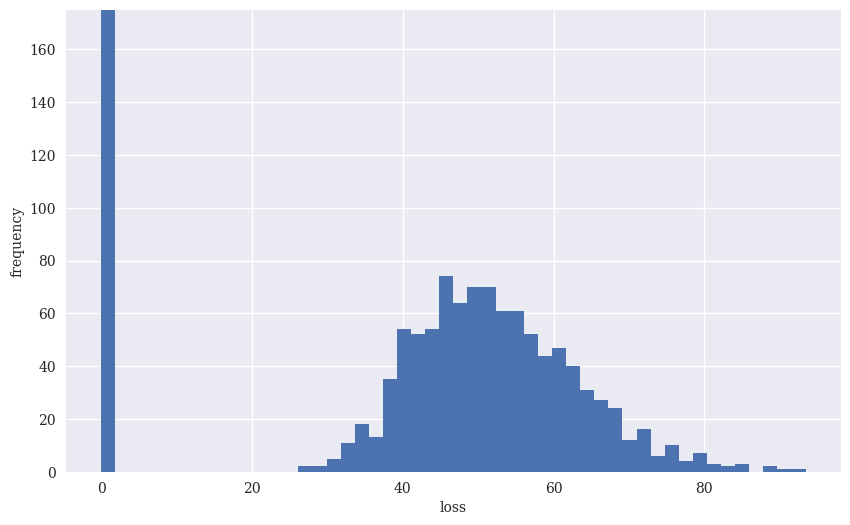

In [114]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * ST, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=175);

이 경우 유러피안 콜 옵션의 가치를 계산하면 행사가가 100인 콜 옵션의 경우 약 10.4입니다. 같은 가정하에 부도 확률과 손실 수준을 고려한 신용 VaR 값은 약 5센트입니다.

In [115]:
K = 100.
hT = np.maximum(ST-K, 0)

In [117]:
# 유러피안 콜 옵션에 대한 몬테카를로 추정 가치
C0 = math.exp(-r * T) * np.mean(hT)
C0

10.396916492839354

In [118]:
# CVaR는 부도 사건이 있을 때 미래 손실의 할인 평균
CVaR = math.exp(-r * T) * np.mean(L * D * hT)
CVaR

0.05159099858923533

In [119]:
C0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * hT)
C0_CVA

10.34532549425012

자산 자체의 경우와 비교하면 옵션의 가치 평가는 약간 다른 특성을 보입니다. 자산의 경우에는 부도로 인한 손실이 1,000회 이상이었는데 옵션의 경우 500회가 약간 넘을 뿐입니다. 이는 옵션의 만기 페이오프가 그 자체로 0이 될 확률이 높기 때문입니다. 아래 그림만 보더라도 옵션에 대한 신용 VaR은 자산 자체의 경우와는 전혀 다른 분포를 보입니다.

In [120]:
# 부도로 인한 손실의 수
np.count_nonzero(L * D * hT)

538

In [121]:
# 부도의 수
np.count_nonzero(D)

978

In [122]:
# 부도로 옵션 가치가 없어지는 경우의 수
I - np.count_nonzero(hT)

44123

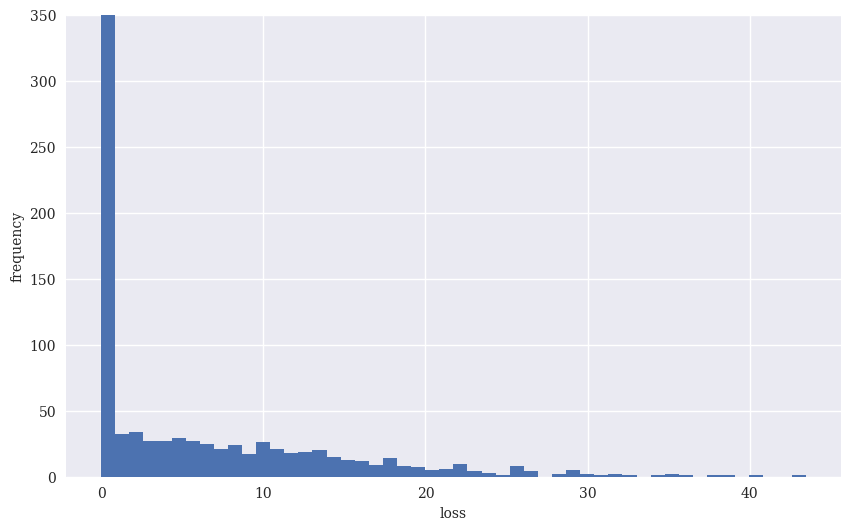

In [123]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=350);

## 12.5 파이썬 스크립트
다음 스크립트는 유러피안 콜 옵션에 대한 블랙-숄즈-머튼 모형과 관련된 중요 함수를 구현한 것입니다. 모형의 자세한 내용은 Black and Scholes(1973) 및 Merton(1973) 문헌을 참조합니다. 파이썬 클래스에 기반한 다른 구현은 [부록 B]에 수록했습니다.

In [124]:
#
# 블랙-숄즈-머튼 모형에 의한 유러피안 콜 옵션의 가치 평가
# (베가함수와 내재 변동성 추정 포함)
# bsm_functions.py
#
# (c) Dr. Yves J. Hilpisch
# Python for Finance, 2nd ed.
#

def bsm_call_value(S0, K, T, r, sigma):
    '''BMS 모형에 의한 유러피안 콜 옵션의 가치 평가
    해석적 공식
    
    인수
    =================
    S0: float
        초기 주가/지수 수준
    K: float
        행사가
    T: float
        만기 (연수로 계산)
    r: float
        고정단기 무위험 이자율
    sigma: float
        변동성
    
    반환값
    ==================
    value: float
        유러피안 콜 옵션의 현재 가치
    '''
    from math import log, sqrt, exp
    from scipy import stats
    
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    # stats.norm.cdf --> 정규분포의 누적분포함수
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) -
             K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

def bsm_vega(S0, K, T,  r, sigma):
    '''BSM 모형에 따른 유러피안 옵션의 베가
    
    인수
    =================
    S0: float
        초기 주가/지수 수준
    K: float
        행사가
    T: float
        만기 (연수로 계산)
    r: float
        고정단기 무위험 이자율
    sigma: float
        변동성
    
    반환값
    ==================
    vega: float
        BSM 공식의 변동성에 대한 편미분, 즉 베가
    '''
    from math import log, sqrt
    from scipy import stats
    
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    vega = S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

# 내재 변동성 함수
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    '''BSM 모형에 따른 유러피안 콜 옵션의 내재 변동성
    
    인수
    =================
    S0: float
        초기 주가/지수 수준
    K: float
        행사가
    T: float
        만기 (연수로 계산)
    r: float
        고정단기 무위험 이자율
    sigma_est: float
        내재 변동성의 추정치
    it: integer
        반복 횟수
    
    반환값
    ==================
    sigma_est: float
        수치적으로 추정한 내재 변동성
    '''
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) /
                      bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est

## 12.6 마치며
이 장에서는 금융공학에서 몬테카를로 시뮬레이션을 응용하는 방법을 다루었습니다. 특히 여러 가지 분포에 따른 준-난수를 생성하는 방법을 살펴봤습니다. 그다음 금융공학 분야에서 중요한 확률변수와 확률 과정을 시뮬레이션했습니다. 이 장에서 자세히 다룬 두 가지는 유러피안 옵션과 아메리칸 옵션의 가치 평가와 VaR, CVA와 같은 위험 측도의 추정 방법입니다.  
몬테카를로 시뮬레이션으로 아메리칸 옵션을 계산하는 것과 같이 계산량이 요구되는 작업에는 넘파이를 사용하는 것이 좋다는 것도 알 수 있었습니다. 이는 넘파이의 함수나 클래스가 C로 구현되어 순수 파이썬 코드보다 속도가 빠르기 때문입니다. 넘파이 사용의 또다른 이점은 벡터화 연산에 따른 코드 가독성 및 간결성입니다.